In [3]:
import numpy as np
import sympy as sp
import scipy as sc
import pandas as pd
from scipy import misc
from scipy.misc import derivative
from sympy import init_printing
import matplotlib.pylab as plt

**PUNTO 1**

In [ ]:
#FUNCION PARA CALCULAR LA DERIVADA DE UN ARRAY (CON try Y except)
def derivate(func,x0,**kwargs):
    '''
    Vectorized replacement of scipy.misc derivative:
        from scipy.misc import derivative
    For usage check the derivative help, e.g, in jupyter: 
        from scipy.misc import derivative
        derivative?
    '''
    try:
        #x0: can be an array or a list  
        nn=np.asarray(x0).shape[0] # force error if float is used 
        fp=np.vectorize(misc.derivative)
    except IndexError:
        fp=misc.derivative
        
    return fp(func,x0,**kwargs)

In [ ]:
t = np.array([1.00, 1.01, 1.02, 1.03, 1.04]) #tiempo [segundos]
i = np.array([3.10, 3.12, 3.14, 3.18, 3.24]) #corriente [amperios]
data = {"tiempo": t,"corriente": i}
df = pd.DataFrame(data)

In [ ]:
derivada_corriente = (df.corriente.values[1:]-df.corriente.values[:-1])/0.01  #0.01 es el paso del tiempo
L = 0.98 #inductancia [herios]
R = 0.142 #resistencia [ohms]
V = L * derivada_corriente + R * df["corriente"][:-1]

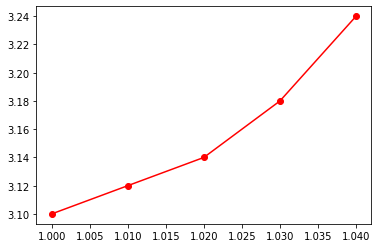

In [ ]:
plt.plot(df.tiempo, df.corriente,"ro-")

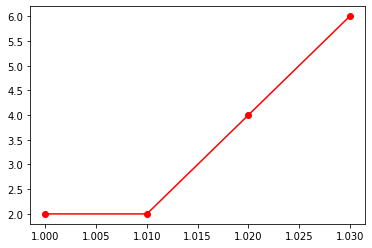

In [ ]:
plt.plot(df.tiempo[:-1], derivada_corriente,"ro-")

**PUNTO 2**


In [1]:
route = "https://docs.google.com/spreadsheets/d/e/2PACX-1vT8btHZ-A6ChzV5Rx_CQmCzbhO10J7R6LvQAyHx9qOCoCDAL9RJgaGUATf2z5lTMo-SjByvrnaX02Cz/pub?output=csv"

In [16]:
df = pd.read_csv(route,";")

In [17]:
col = ["Tiempo[ms]", "AnguloDeg", "AnguloRad"]
df = df.rename(columns = {'Tiempo (ms)':"Tiempo[ms]", 'Ángulo 1,':'AnguloDeg'}) #Renombrar las columnas


In [18]:
eval_ = np.vectorize(eval) #Vectorizando la funcion "eval", para poderla usar sobre toda la columna
df["AnguloDeg"] = df["AnguloDeg"].str.replace(",",".").astype("float64")

In [19]:
df["AnguloRad"] = np.deg2rad(df["AnguloDeg"].values)

(0.0, 30000.0)

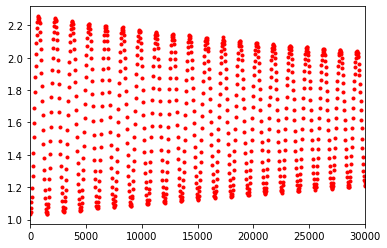

In [24]:
plt.figure()
plt.plot(df["Tiempo[ms]"],df["AnguloRad"],"r.")
plt.xlim(0,30000)

In [ ]:
#Como a medida que el tiempo aumenta el ángulo disminuye, se concluye que es un movimiento amortiguado

In [25]:
from scipy.fft import fft,fftfreq

(0.6, 0.75)

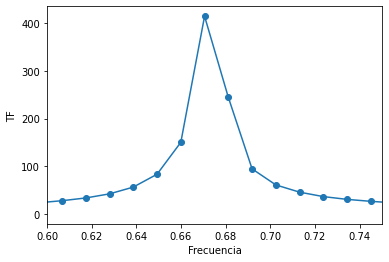

In [34]:
tf = fft(df["AnguloRad"].values) #Transformada de Fourier
T = 33E-3 #Paso del tiempo
N = len(df["Tiempo[ms]"]) #Número de datos de tiempo
xf = fftfreq(N, T)[:N//2] #Frecuencia
plt.plot(xf[1:N//2],np.abs(tf[1:N//2]),"o-")
plt.ylabel("TF")
plt.xlabel("Frecuencia")
plt.xlim(0.6,0.75) #Mejor en este intervalo, pues es donde se encuentra este pico (para el intervalo que propone el ejercicio el grafico se ve poco adecuado)

In [36]:
#Interpolación
from scipy.interpolate import CubicSpline
cs = CubicSpline(xf[1:N//2], np.abs(tf[1:N//2]))


In [45]:
#Minimo
from scipy import optimize
minimo = optimize.fmin_powell(cs, 0.2)
abs(cs(minimo))

Optimization terminated successfully.
         Current function value: 0.842280
         Iterations: 4
         Function evaluations: 71


0.8422796094453178

In [44]:
abs(cs(minimo))

array(0.84227961)